# Autoencoder

The number of input neurons is equal to the number of output neurons.

## Example Autoencoder

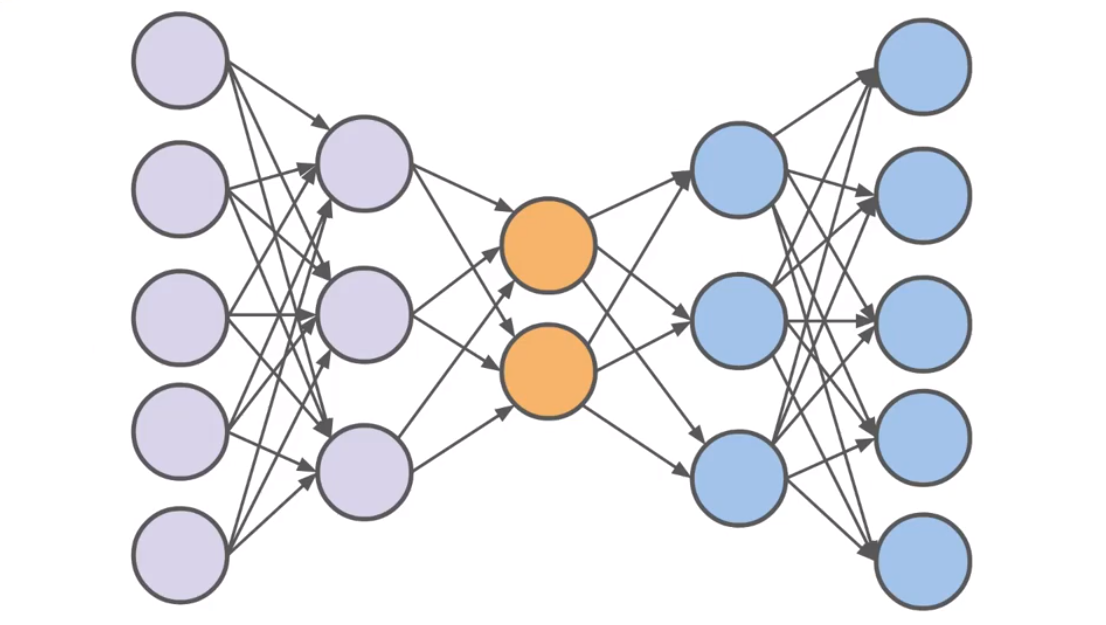

Feed forward network that is trained to reproduce the input layer at the output layer.

Encode ----> Decode

Using hidden layer to extract meaningful features.  
Applicable for Principal Component Analysis. 

# Dimensionality Reduction with Linear Autoencoder

Reduce many dimensions to fewer dimensions which represent the original dimensions. 

Linear Autoencoders do not have activation functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
from sklearn.datasets import make_blobs

In [4]:
data = make_blobs(n_samples=100,n_features=3,centers=2,random_state=101)

In [5]:
type(data)

tuple

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data[0])

In [25]:
data_x = scaled_data[:,0]
data_y = scaled_data[:,1]
data_z = scaled_data[:,2]

In [26]:
from mpl_toolkits.mplot3d import Axes3D

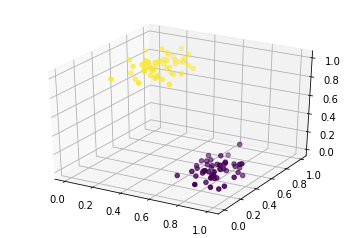

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(data_x,data_y,data_z,c=data[1])

The two blobs are highly seperable

In [29]:
import tensorflow as tf
from tensorflow.contrib.layers import fully_connected

C:\Users\User\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [37]:
num_inputs = 3
num_hidden = 2
num_outputs = num_inputs

In [38]:
learning_rate = 0.01

In [39]:
X = tf.placeholder(tf.float32, shape=[None,num_inputs])

In [40]:
hidden = fully_connected(X,num_hidden,activation_fn=None)
outputs = fully_connected(hidden,num_outputs,activation_fn=None)

In [41]:
loss = tf.reduce_mean(tf.square(outputs-X))

In [42]:
optimizer = tf.train.AdamOptimizer(learning_rate)

In [43]:
train = optimizer.minimize(loss)

In [44]:
init = tf.global_variables_initializer()

In [45]:
num_steps = 1000

with tf.Session() as sess:
    sess.run(init)
    
    for iteration in range(num_steps):
        sess.run(train,feed_dict={X:scaled_data})
        
    output_2d = hidden.eval(feed_dict={X:scaled_data})

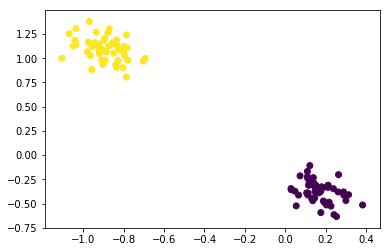

In [48]:
plt.scatter(output_2d[:,0],output_2d[:,1],c = data[1])

# Stacked Autoencoder